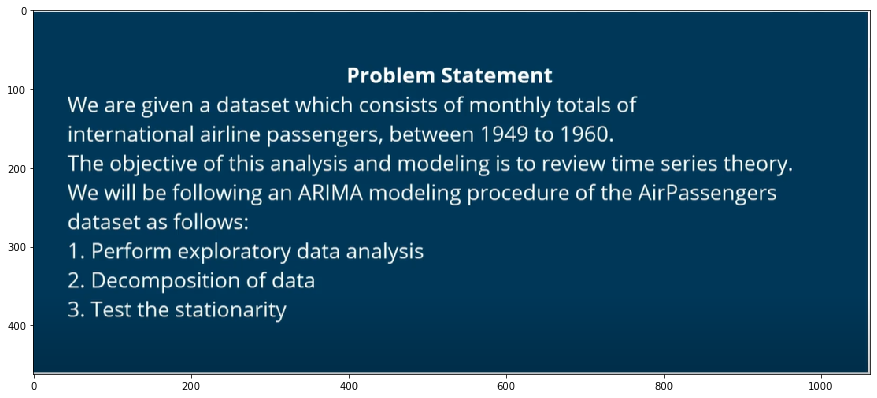

In [20]:
#Problem statment
import os
os.chdir('D:\Simplilearn Goal\Machine Learning course')
import matplotlib.pyplot as plt
%matplotlib inline
img=plt.imread('Airline.png')
plt.figure(figsize=(15,10))
plt.imshow(img)

In [2]:
#import required libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6
import math
import warnings
warnings.filterwarnings('ignore')   #Ignore libraries warnings
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime as dt
import os 
os.chdir('D:\Simplilearn Goal\Machine Learning course\Demo Datasets\Lesson 8')

In [3]:
df=pd.read_csv('AirPassengers.csv')

In [4]:
df['Month']=df['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))

In [5]:
df=df.set_index('Month')

In [6]:
df.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


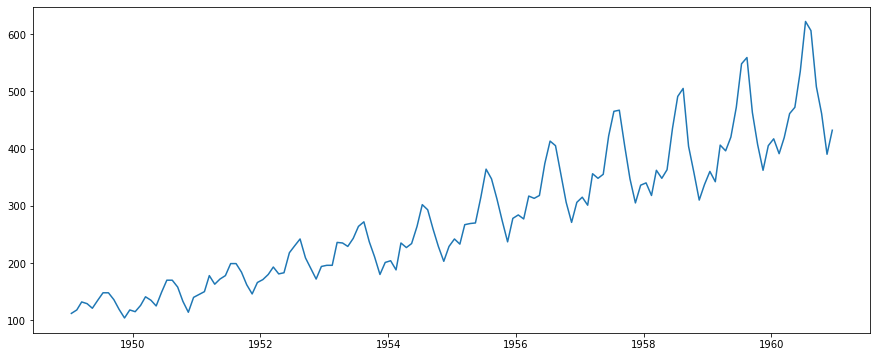

In [7]:
ts=df['#Passengers']
plt.plot(ts)

In [8]:
ts_log=np.log(ts)

In [9]:
#Stationary Test Function
def test_stationary(timeseries):
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    org=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Mean')
    std=plt.plot(rolstd,color='black',label='Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Devation')
    plt.show(block=False)
    
    print('Results of Dicky-fuller test')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Text Statistic','p-value','#Lags used','Number of Observations used'])
    
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key] = value
    print(dfoutput)


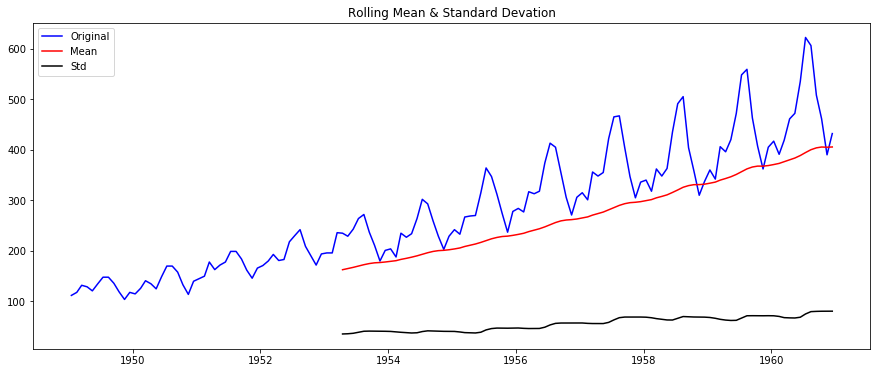

Results of Dicky-fuller test
Text Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of Observations used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


In [10]:
test_stationary(df['#Passengers'])

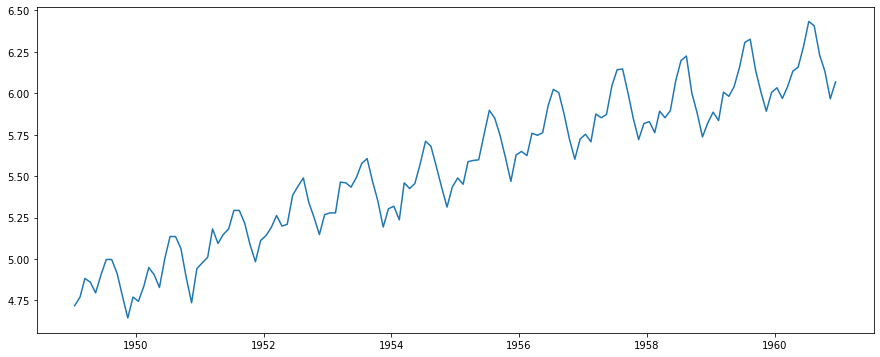

In [11]:
#As per the define formula of time series text statistic > critical value accept the null hypithesis and time series is not stationary
plt.plot(ts_log)

Month
1949-01-15         NaN
1949-02-15         NaN
1949-03-15         NaN
1949-04-15         NaN
1949-05-15         NaN
                ...   
1960-08-15    5.973366
1960-09-15    5.982375
1960-10-15    5.986396
1960-11-15    5.985295
1960-12-15    5.986536
Name: #Passengers, Length: 144, dtype: float64
Month
1949-01-15         NaN
1949-02-15         NaN
1949-03-15         NaN
1949-04-15         NaN
1949-05-15         NaN
                ...   
1960-08-15    0.190435
1960-09-15    0.191320
1960-10-15    0.192270
1960-11-15    0.192218
1960-12-15    0.192548
Name: #Passengers, Length: 144, dtype: float64


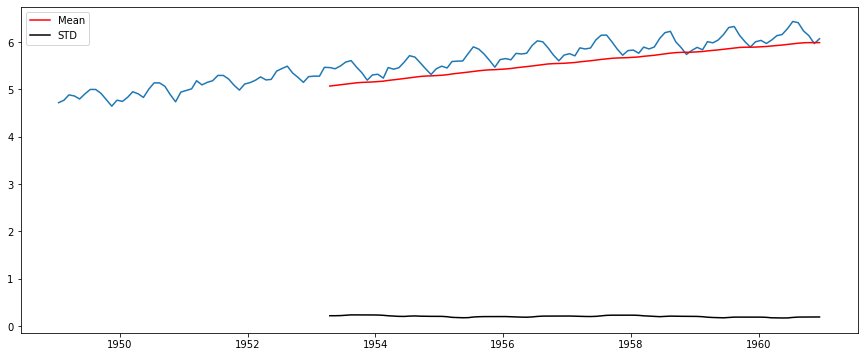

In [12]:
MovingAverage=ts_log.rolling(window=52,center=False).mean()
MovingStd=ts_log.rolling(window=52,center=False).std()
print(MovingAverage)
print(MovingStd)
plt.plot(ts_log)
plt.plot(MovingAverage,color='red',label='Mean')
plt.plot(MovingStd,color='black',label='STD')
plt.legend()
plt.show()

In [13]:
ts_log_mv_diff=ts_log-MovingAverage
ts_log_mv_diff.head()
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(12)

Month
1953-04-15    0.390598
1953-05-15    0.350980
1953-06-15    0.396428
1953-07-15    0.465985
1953-08-15    0.481492
1953-09-15    0.330822
1953-10-15    0.206032
1953-11-15    0.043367
1953-12-15    0.147828
1954-01-15    0.154846
1954-02-15    0.064373
1954-03-15    0.271840
Name: #Passengers, dtype: float64

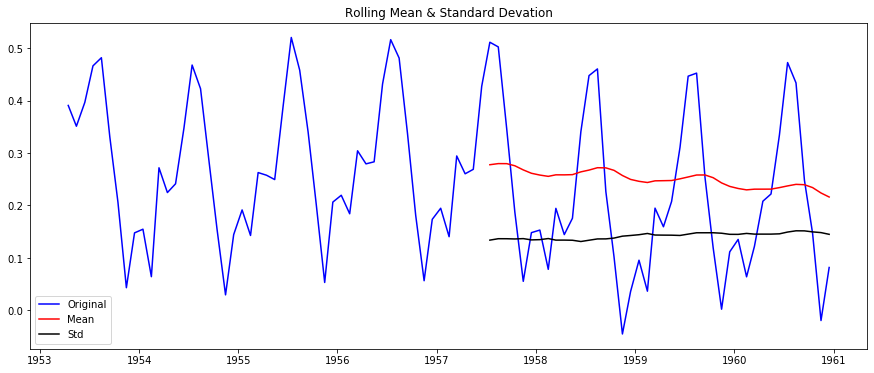

Results of Dicky-fuller test
Text Statistic                 -0.752629
p-value                         0.832643
#Lags used                     12.000000
Number of Observations used    80.000000
critical value (1%)            -3.514869
critical value (5%)            -2.898409
critical value (10%)           -2.586439
dtype: float64


In [14]:
test_stationary(ts_log_mv_diff)

In [15]:
#Conclusion as Test statistic < critical value as we can reject the null hypothesis

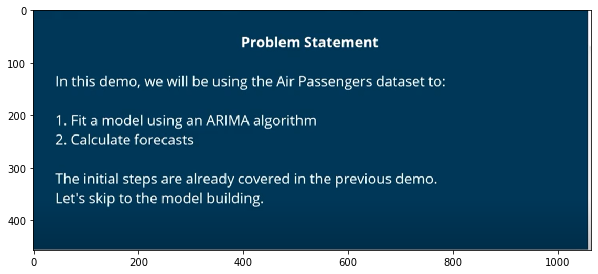

In [21]:
#Model Building
img_1=plt.imread('Airline_model_bulding.png')
plt.figure(figsize=(10,5))
plt.imshow(img_1)

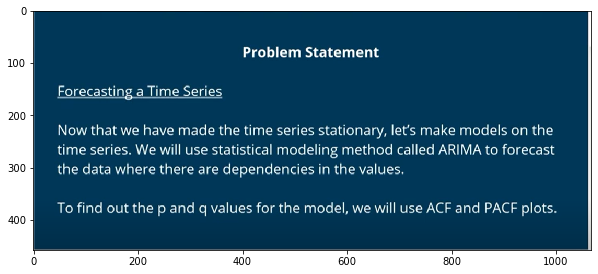

In [22]:
img_2=plt.imread('Airline_model_Forcast.png')
plt.figure(figsize=(10,5))
plt.imshow(img_2)

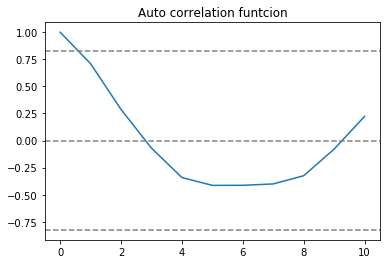

In [28]:
#Ploting acf graph
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.title('Auto correlation funtcion')
plt.show()

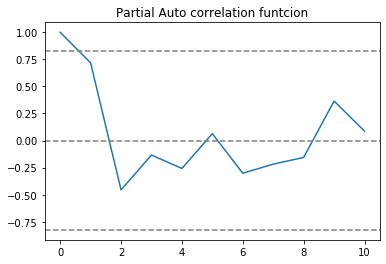

In [29]:
#Ploting acf graph
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='grey')
plt.title('Partial Auto correlation funtcion')
plt.show()

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


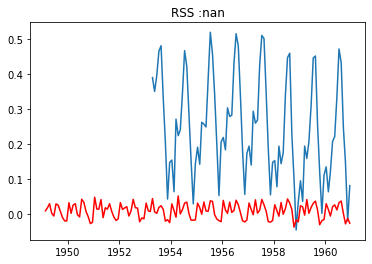

In [57]:
model=ARIMA(ts_log,order=(1,1,0))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS :%.4f'%sum((results_ARIMA.fittedvalues[1:]-ts_log_mv_diff)**2))
plt.show()

In [33]:
#model predictions
pred_arima_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
pred_arima_diff.head()

Month
1949-02-15    0.009676
1949-03-15    0.018164
1949-04-15    0.030130
1949-05-15    0.003154
1949-06-15   -0.005039
dtype: float64

In [34]:
pred_arima_diff_cum_sum=pred_arima_diff.cumsum()
pred_arima_diff_cum_sum.head()

Month
1949-02-15    0.009676
1949-03-15    0.027839
1949-04-15    0.057969
1949-05-15    0.061123
1949-06-15    0.056084
dtype: float64

In [36]:
pred_Arima_log=pd.Series(ts_log.ix[0],index=ts_log.index)
pred_Arima_log=pred_Arima_log.add(pred_arima_diff_cum_sum,fill_value=0)
pred_Arima_log.head()

Month
1949-01-15    4.718499
1949-02-15    4.728175
1949-03-15    4.746338
1949-04-15    4.776468
1949-05-15    4.779622
dtype: float64

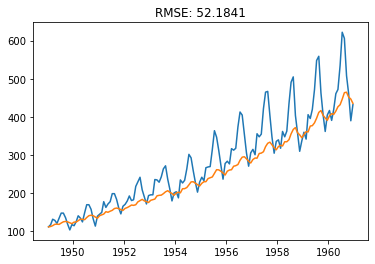

In [51]:
predictions_ARIMA=np.exp(pred_Arima_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show()

Month
1949-01-15    4.718499
1949-02-15    4.718499
1949-03-15    4.718499
1949-04-15    4.718499
1949-05-15    4.718499
                ...   
1960-08-15    4.718499
1960-09-15    4.718499
1960-10-15    4.718499
1960-11-15    4.718499
1960-12-15    4.718499
Length: 144, dtype: float64